In [4]:
import numpy as np
import pandas as pd
import random
from datetime import datetime
import matplotlib.pyplot as plt
import os.path
from bs4 import BeautifulSoup
import requests
import wfdb

In [12]:
record_segment_good_length_path = '../../../2_data/'

In [13]:
!ls -l $record_segment_good_length_path

total 30936
-rw-r--r--   1 tarus  staff   286811 Feb  3 23:19 record_segment_good_length_0_1774.csv
-rw-r--r--   1 tarus  staff  2546376 Feb  5 00:23 record_segment_good_length_0_8858.csv
-rw-r--r--   1 tarus  staff  3084991 Feb  5 05:24 record_segment_good_length_0_9999.csv
-rw-r--r--   1 tarus  staff  3511872 Feb  7 20:31 record_segment_good_length_10000_16999.csv
-rw-r--r--   1 tarus  staff  3752840 Feb  7 10:16 record_segment_good_length_10000_22316.csv
-rw-r--r--   1 tarus  staff  2638552 Feb  6 15:31 record_segment_good_length_17000_22316.csv
drwxr-xr-x  14 tarus  staff      448 Feb  3 20:05 xold_01
drwxr-xr-x   6 tarus  staff      192 Feb  5 15:16 y_backup


In [14]:
path_1 = record_segment_good_length_path + 'record_segment_good_length_0_9999.csv'
path_2 = record_segment_good_length_path + 'record_segment_good_length_10000_16999.csv'
path_3 = record_segment_good_length_path + 'record_segment_good_length_17000_22316.csv'

In [17]:
df1 = pd.read_csv(path_1)
df2 = pd.read_csv(path_2)
df3 = pd.read_csv(path_3)

In [18]:
df1.head()

,4,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
0,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
1,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
2,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
3,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0007
4,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0008


In [4]:
first_record = 0
last_record = 1774
record_list_file = record_segment_good_length_path + 'record_segment_good_length_' + str(first_record) + '_' + str(last_record) + '.csv'
print('record_list_file: {}'.format(record_list_file))

record_list_file: ../../../2_data/record_segment_good_length_0_1774.csv


In [5]:
!ls -l $record_list_file

-rw-r--r--  1 tarus  staff  286811 Feb  3 23:19 ../../../2_data/record_segment_good_length_0_1774.csv


In [6]:
segment_list_1 = pd.read_csv(record_list_file, header=None)
# segment_list_1 to be replaced with selected_records

In [7]:
segment_list_1.head()

,0,1,2
0,4,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0007


In [23]:
directory = [y[0] + '/' + y[1] + '/' for y in [x.split('/') for x in segment_list_1.iloc[:,1]]]
#directory

In [24]:
matched_record = [y[2] for y in [x.split('/') for x in segment_list_1.iloc[:,1]]]
#matched_record

In [32]:
user_id = [int(y[1][1:]) for y in [x.split('/') for x in segment_list_1.iloc[:,1]]]
#user_id

In [25]:
segment_list_1.insert(loc=1, column='directory', value=directory)

In [26]:
segment_list_1.head()

,0,directory,1,2
0,4,p00/p000052/,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,5,p00/p000052/,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,5,p00/p000052/,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,5,p00/p000052/,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,5,p00/p000052/,p00/p000052/p000052-2191-01-10-12-15,3533390_0007


In [27]:
segment_list_1.insert(loc=2, column='matched_record', value=matched_record)

In [34]:
segment_list_1.head()

,0,directory,matched_record,1,2
0,4,p00/p000052/,p000052-2191-01-10-02-21,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,5,p00/p000052/,p000052-2191-01-10-12-15,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,5,p00/p000052/,p000052-2191-01-10-12-15,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,5,p00/p000052/,p000052-2191-01-10-12-15,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,5,p00/p000052/,p000052-2191-01-10-12-15,p00/p000052/p000052-2191-01-10-12-15,3533390_0007


In [35]:
segment_list_1.insert(loc=1, column='user_id', value=user_id)

In [36]:
segment_list_1.head()

,0,user_id,directory,matched_record,1,2
0,4,52,p00/p000052/,p000052-2191-01-10-02-21,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,5,52,p00/p000052/,p000052-2191-01-10-12-15,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,5,52,p00/p000052/,p000052-2191-01-10-12-15,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,5,52,p00/p000052/,p000052-2191-01-10-12-15,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,5,52,p00/p000052/,p000052-2191-01-10-12-15,p00/p000052/p000052-2191-01-10-12-15,3533390_0007


In [39]:
# drop the 'record_path' column (fifth column here)
segment_list_1.drop(segment_list_1.columns[[0,4]], axis=1, inplace=True)

In [40]:
segment_list_1.head()

,user_id,directory,matched_record,2
0,52,p00/p000052/,p000052-2191-01-10-02-21,3238451_0005
1,52,p00/p000052/,p000052-2191-01-10-12-15,3533390_0001
2,52,p00/p000052/,p000052-2191-01-10-12-15,3533390_0003
3,52,p00/p000052/,p000052-2191-01-10-12-15,3533390_0004
4,52,p00/p000052/,p000052-2191-01-10-12-15,3533390_0007


In [41]:
segment_list_1.columns = ['user_id', 'directory', 'matched_record', 'record_segment']

In [42]:
segment_list_1.head()

,user_id,directory,matched_record,record_segment
0,52,p00/p000052/,p000052-2191-01-10-02-21,3238451_0005
1,52,p00/p000052/,p000052-2191-01-10-12-15,3533390_0001
2,52,p00/p000052/,p000052-2191-01-10-12-15,3533390_0003
3,52,p00/p000052/,p000052-2191-01-10-12-15,3533390_0004
4,52,p00/p000052/,p000052-2191-01-10-12-15,3533390_0007


In [48]:
tmp_df = segment_list_1.groupby(segment_list_1.loc[:,'matched_record'],as_index=False).agg(list)

In [49]:
tmp_df

,matched_record,user_id,directory,record_segment
0,p000052-2191-01-10-02-21,[52],[p00/p000052/],[3238451_0005]
1,p000052-2191-01-10-12-15,"[52, 52, 52, 52, 52, 52, 52, 52, 52]","[p00/p000052/, p00/p000052/, p00/p000052/, p00...","[3533390_0001, 3533390_0003, 3533390_0004, 353..."
2,p000107-2121-11-30-20-03,"[107, 107, 107, 107, 107, 107, 107, 107, 107, ...","[p00/p000107/, p00/p000107/, p00/p000107/, p00...","[3805787_0005, 3805787_0008, 3805787_0011, 380..."
3,p000107-2122-05-14-21-01,"[107, 107, 107, 107, 107, 107, 107, 107, 107, ...","[p00/p000107/, p00/p000107/, p00/p000107/, p00...","[3860035_0001, 3860035_0004, 3860035_0006, 386..."
4,p000107-2123-07-26-03-10,"[107, 107, 107, 107, 107, 107, 107]","[p00/p000107/, p00/p000107/, p00/p000107/, p00...","[3746356_0006, 3746356_0008, 3746356_0012, 374..."
...,...,...,...,...
547,p007241-2173-08-13-16-36,[7241],[p00/p007241/],[3867326_0005]
548,p007241-2178-03-26-15-36,"[7241, 7241, 7241]","[p00/p007241/, p00/p007241/, p00/p007241/]","[3162939_0008, 3162939_0012, 3162939_0016]"
549,p007241-2178-05-06-16-17,"[7241, 7241, 7241, 7241, 7241, 7241, 7241, 724...","[p00/p007241/, p00/p007241/, p00/p007241/, p00...","[3192148_0002, 3192148_0008, 3192148_0011, 319..."
550,p007251-2151-01-14-00-40,"[7251, 7251, 7251, 7251, 7251, 7251, 7251, 725...","[p00/p007251/, p00/p007251/, p00/p007251/, p00...","[3259702_0001, 3259702_0010, 3259702_0011, 325..."


In [70]:
selected_fragments = tmp_df.loc[:,'matched_record'].to_frame()
selected_fragments.head()

,matched_record
0,p000052-2191-01-10-02-21
1,p000052-2191-01-10-12-15
2,p000107-2121-11-30-20-03
3,p000107-2122-05-14-21-01
4,p000107-2123-07-26-03-10


In [71]:
type(selected_fragments)

pandas.core.frame.DataFrame

In [72]:
user_id = [x[0] for x in tmp_df.loc[:,'user_id']]
user_id[:10]

[52, 52, 107, 107, 107, 109, 109, 109, 109, 109]

In [73]:
directory = [x[0] for x in tmp_df.loc[:,'directory']]
directory[:10]

['p00/p000052/',
 'p00/p000052/',
 'p00/p000107/',
 'p00/p000107/',
 'p00/p000107/',
 'p00/p000109/',
 'p00/p000109/',
 'p00/p000109/',
 'p00/p000109/',
 'p00/p000109/']

In [74]:
record_segment = tmp_df.loc[:,'record_segment']
record_segment[:10]

0                                       [3238451_0005]
1    [3533390_0001, 3533390_0003, 3533390_0004, 353...
2    [3805787_0005, 3805787_0008, 3805787_0011, 380...
3    [3860035_0001, 3860035_0004, 3860035_0006, 386...
4    [3746356_0006, 3746356_0008, 3746356_0012, 374...
5    [3034224_0006, 3034224_0008, 3034224_0010, 303...
6    [3407610_0004, 3407610_0006, 3407610_0009, 340...
7    [3943625_0004, 3943625_0006, 3943625_0009, 394...
8                         [3002540_0001, 3002540_0004]
9                                       [3924895_0003]
Name: record_segment, dtype: object

In [75]:
selected_fragments.insert(loc=0, column='user_id', value=user_id)
selected_fragments.head()

,user_id,matched_record
0,52,p000052-2191-01-10-02-21
1,52,p000052-2191-01-10-12-15
2,107,p000107-2121-11-30-20-03
3,107,p000107-2122-05-14-21-01
4,107,p000107-2123-07-26-03-10


In [76]:
selected_fragments.insert(loc=1, column='directory', value=directory)
selected_fragments.head()

,user_id,directory,matched_record
0,52,p00/p000052/,p000052-2191-01-10-02-21
1,52,p00/p000052/,p000052-2191-01-10-12-15
2,107,p00/p000107/,p000107-2121-11-30-20-03
3,107,p00/p000107/,p000107-2122-05-14-21-01
4,107,p00/p000107/,p000107-2123-07-26-03-10


In [77]:
selected_fragments.insert(loc=3, column='record_segment', value=record_segment)
selected_fragments.head()

,user_id,directory,matched_record,record_segment
0,52,p00/p000052/,p000052-2191-01-10-02-21,[3238451_0005]
1,52,p00/p000052/,p000052-2191-01-10-12-15,"[3533390_0001, 3533390_0003, 3533390_0004, 353..."
2,107,p00/p000107/,p000107-2121-11-30-20-03,"[3805787_0005, 3805787_0008, 3805787_0011, 380..."
3,107,p00/p000107/,p000107-2122-05-14-21-01,"[3860035_0001, 3860035_0004, 3860035_0006, 386..."
4,107,p00/p000107/,p000107-2123-07-26-03-10,"[3746356_0006, 3746356_0008, 3746356_0012, 374..."


In [86]:
directory = selected_fragments['directory'][0]
directory

'p00/p000052/'

In [84]:
record_name = selected_fragments['record_segment'][0][0]
record_name

'3238451_0005'

In [87]:
record_segment_signal = wfdb.rdsamp(record_name=record_name,
                                    pn_dir='mimic3wdb-matched/1.0/' + directory,
                                    channel_names=['PLETH'])

In [88]:
record_segment_signal

(array([[0.52492669],
        [0.514174  ],
        [0.49755621],
        ...,
        [0.4056696 ],
        [0.38807429],
        [0.3714565 ]]),
 {'fs': 125,
  'sig_len': 3869120,
  'n_sig': 1,
  'base_date': None,
  'base_time': datetime.time(2, 21, 42, 248000),
  'units': ['NU'],
  'sig_name': ['PLETH'],
  'comments': []})

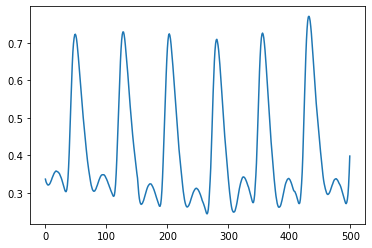

In [93]:
# Plotting the signal
plt.figure()
plt.plot(record_segment_signal[0][6500:7000])
plt.show()        

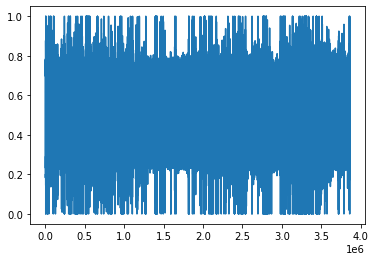

In [95]:
# Plotting the signal
plt.figure()
plt.plot(record_segment_signal[0][6000:])
plt.show() 